## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [2]:
#Reading Data

Train_Data = pd.read_csv('train.csv')


In [3]:
#Displaying Data

Train_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Train_Data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
#Gathering info around data

Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
Train_Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
Train_Data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sivola, Mr. Antti Wilhelm",male,347082,B96 B98,S
freq,1,577,7,4,644


## Analyzing data using pivoting functions 

In [8]:
Train_Data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
Train_Data[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [10]:
Train_Data[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [11]:
Train_Data[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


## Visualizing Data 

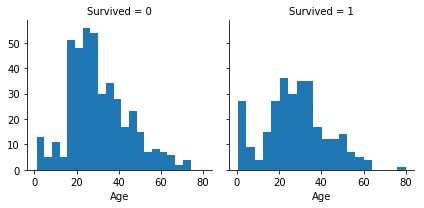

In [12]:
g= sns.FacetGrid(Train_Data,col='Survived')
g.set_axis_labels(x_var="Age",y_var="Survived")
g.map(plt.hist,'Age',bins=20)

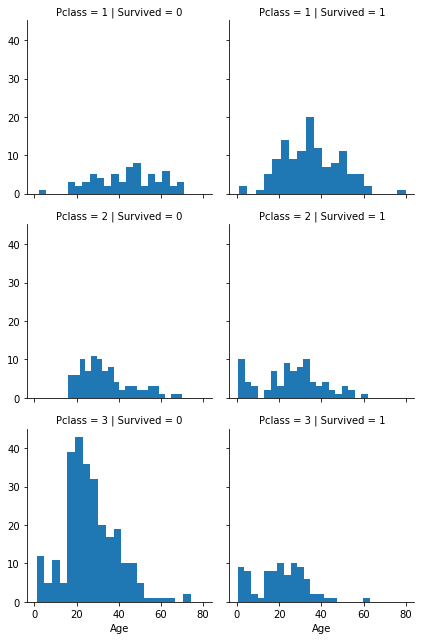

In [13]:
g = sns.FacetGrid(Train_Data,row='Pclass',col='Survived')
g.map(plt.hist,'Age',bins=20)

/Users/santhosh.ramachandra/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/santhosh.ramachandra/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


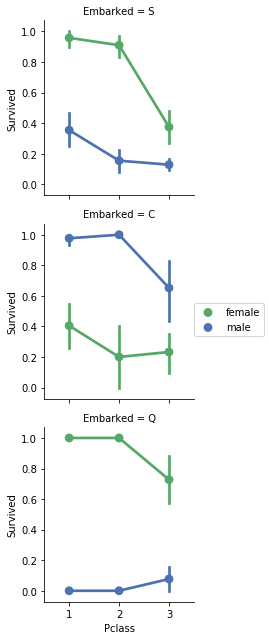

In [14]:
g = sns.FacetGrid(Train_Data,row='Embarked')
g.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
g.add_legend()

## Creating New Features

In [15]:
#Dropping Unnecessary Data
Train_Data = Train_Data.drop(['Cabin','Ticket'],axis=1)

In [16]:
#creating new features

#Extract Title from Name
    
Train_Data['Title'] = Train_Data['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [17]:
pd.crosstab(Train_Data['Title'],Train_Data['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [18]:
#Repleacing Rare Titles

Train_Data['Title'] = Train_Data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [19]:
Train_Data['Title'] = Train_Data['Title'].replace('Ms','Miss')
Train_Data['Title'] = Train_Data['Title'].replace('Mlle','Miss')
Train_Data['Title'] = Train_Data['Title'].replace('Mme','Mrs')

In [20]:
pd.crosstab(Train_Data['Title'],Train_Data['Survived'])

Survived,0,1
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Rare,15,8


In [21]:
Train_Data[['Title','Survived']].groupby('Title').mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [22]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

Train_Data['Title'] = Train_Data['Title'].map(title_mapping)

In [26]:
sex_mapping = {"female": 0, "male": 1}
Train_Data['Sex'] = Train_Data['Sex'].map(sex_mapping)

In [27]:
Train_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,1


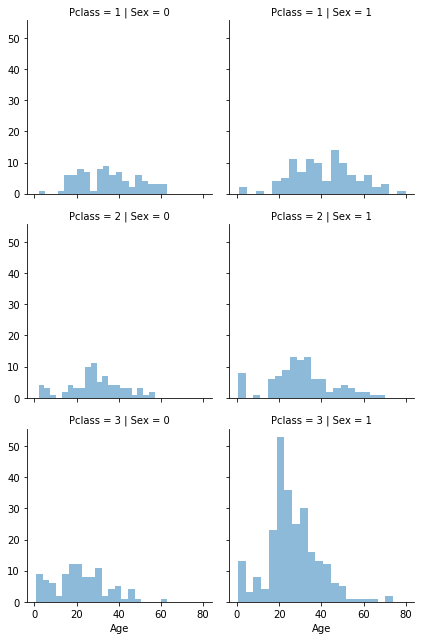

In [28]:
grid = sns.FacetGrid(Train_Data, row='Pclass', col='Sex')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

In [29]:
Train_Data['AgeBand'] = pd.cut(Train_Data['Age'], 5)

In [33]:
Train_Data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [36]:
Train_Data.loc[ Train_Data['Age'] <= 16, 'Age'] = 0
Train_Data.loc[(Train_Data['Age'] > 16) & (Train_Data['Age'] <= 32), 'Age'] = 1
Train_Data.loc[(Train_Data['Age'] > 32) & (Train_Data['Age'] <= 48), 'Age'] = 2
Train_Data.loc[(Train_Data['Age'] > 48) & (Train_Data['Age'] <= 64), 'Age'] = 3
Train_Data.loc[ Train_Data['Age'] > 64, 'Age']
Train_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,71.2833,C,3,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,7.9250,S,2,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,53.1000,S,3,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,8.0500,S,1,"(32.252, 48.168]"


In [38]:
Train_Data = Train_Data.drop('AgeBand',axis=1)

In [41]:
Train_Data['FamilySize'] = Train_Data['SibSp'] + Train_Data['Parch'] + 1

In [42]:
Train_Data[['FamilySize','Survived']].groupby('FamilySize').mean()

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [43]:
Train_Data['isAlone'] = 0
Train_Data.loc[Train_Data['FamilySize'] == 1,'isAlone'] = 1

In [44]:
Train_Data[['isAlone','Survived']].groupby('isAlone').mean()

,Survived
isAlone,
0,0.505650
1,0.303538


In [45]:
Train_Data = Train_Data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

In [47]:
Train_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,71.2833,C,3,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,7.9250,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,53.1000,S,3,0
4,5,0,3,"Allen, Mr. William Henry",1,2.0,8.0500,S,1,1


In [48]:
Train_Data['AgeClass'] = Train_Data['Pclass'] * Train_Data['Age']

In [49]:
Train_Data['AgeClass'].head()

0    3.0
1    2.0
2    3.0
3    2.0
4    6.0
Name: AgeClass, dtype: float64

In [59]:
frequnet_port = Train_Data.Embarked.dropna().mode()[0]

In [60]:
Train_Data['Embarked'] = Train_Data['Embarked'].fillna(frequnet_port)

In [62]:
Train_Data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [64]:
embarked_map = {'S':0,'C':1,'Q':2}
Train_Data['Embarked'] = Train_Data['Embarked'].map(embarked_map)

In [65]:
Train_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,isAlone,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,7.2500,0,1,0,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,71.2833,1,3,0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,7.9250,0,2,1,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,53.1000,0,3,0,2.0
4,5,0,3,"Allen, Mr. William Henry",1,2.0,8.0500,0,1,1,6.0


In [80]:
Train_Data['FareBand'] = pd.cut(Train_Data.Fare,bins=5)

In [81]:
Train_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,isAlone,AgeClass,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,7.2500,0,1,0,3.0,"(-0.512, 102.466]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,71.2833,1,3,0,2.0,"(-0.512, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,7.9250,0,2,1,3.0,"(-0.512, 102.466]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,53.1000,0,3,0,2.0,"(-0.512, 102.466]"
4,5,0,3,"Allen, Mr. William Henry",1,2.0,8.0500,0,1,1,6.0,"(-0.512, 102.466]"


In [82]:
Train_Data[['FareBand','Survived']].groupby('FareBand').mean()

,Survived
FareBand,
"(-0.512, 102.466]",0.361575
"(102.466, 204.932]",0.757576
"(204.932, 307.398]",0.647059
"(307.398, 409.863]",NaN
"(409.863, 512.329]",1.000000


In [83]:
Train_Data.loc[ Train_Data['Fare'] <= 7.91, 'Fare'] = 0
Train_Data.loc[(Train_Data['Fare'] > 7.91) & (Train_Data['Fare'] <= 14.454), 'Fare'] = 1
Train_Data.loc[(Train_Data['Fare'] > 14.454) & (Train_Data['Fare'] <= 31), 'Fare']   = 2
Train_Data.loc[ Train_Data['Fare'] > 31, 'Fare'] = 3

In [84]:
Train_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,isAlone,AgeClass,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,0.0,0,1,0,3.0,"(-0.512, 102.466]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,3.0,1,3,0,2.0,"(-0.512, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,1.0,0,2,1,3.0,"(-0.512, 102.466]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,3.0,0,3,0,2.0,"(-0.512, 102.466]"
4,5,0,3,"Allen, Mr. William Henry",1,2.0,1.0,0,1,1,6.0,"(-0.512, 102.466]"


In [86]:
Train_Data = Train_Data.drop('FareBand',axis=1)

In [101]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
Fare           891 non-null float64
Embarked       891 non-null int64
Title          891 non-null int64
isAlone        891 non-null int64
AgeClass       714 non-null float64
dtypes: float64(3), int64(7), object(1)
memory usage: 76.6+ KB


## Neural Network Model 

In [102]:
PassengerId = tf.feature_column.numeric_column('PassengerId')
Pclass = tf.feature_column.numeric_column('Pclass')
Sex = tf.feature_column.numeric_column('Sex')
Age = tf.feature_column.numeric_column('Age')
Fare = tf.feature_column.numeric_column('Fare')
Embarked = tf.feature_column.numeric_column('Embarked')
Title = tf.feature_column.numeric_column('Title')
isAlone = tf.feature_column.numeric_column('isAlone')
AgeClass = tf.feature_column.numeric_column('AgeClass')

In [103]:
Train_Data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Embarked', 'Title', 'isAlone', 'AgeClass'], dtype=object)

In [112]:
feature_cols = [PassengerId, Pclass, Sex,Age,Fare,Embarked,Title,isAlone,AgeClass]

In [113]:
Model = tf.estimator.DNNClassifier([10,10,10,10],feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_model_dir': '/var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmpj_oh19zx', '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_save_checkpoints_steps': None}


In [128]:
X = Train_Data.drop(['Name','Survived'],axis = 1)

X.loc[X['Age'].isnull() ==1,'Age'] = 0
X.loc[X['AgeClass'].isnull() ==1,'AgeClass'] = 0

In [129]:
y = Train_Data['Survived']

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [132]:
train_ip_function = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=50,num_epochs=1000,shuffle=True)

In [133]:
Model.train(train_ip_function,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmpj_oh19zx/model.ckpt.
INFO:tensorflow:step = 1, loss = 193.596
INFO:tensorflow:global_step/sec: 424.515
INFO:tensorflow:step = 101, loss = 39.2633 (0.236 sec)
INFO:tensorflow:global_step/sec: 436.797
INFO:tensorflow:step = 201, loss = 36.4255 (0.229 sec)
INFO:tensorflow:global_step/sec: 443.027
INFO:tensorflow:step = 301, loss = 28.8149 (0.226 sec)
INFO:tensorflow:global_step/sec: 444.35
INFO:tensorflow:step = 401, loss = 40.6309 (0.225 sec)
INFO:tensorflow:global_step/sec: 439.215
INFO:tensorflow:step = 501, loss = 30.2727 (0.228 sec)
INFO:tensorflow:global_step/sec: 446.592
INFO:tensorflow:step = 601, loss = 34.0666 (0.224 sec)
INFO:tensorflow:global_step/sec: 438.571
INFO:tensorflow:step = 701, loss = 35.8039 (0.228 sec)
INFO:tensorflow:global_step/sec: 440.523
INFO:tensorflow:step = 801, loss = 31.9051 (0.227 sec)
INFO:tensorflow:global_step/s

In [134]:
test_ip_function = tf.estimator.inputs.pandas_input_fn(X_test,y_test,batch_size=50,num_epochs=1000,shuffle=False)

In [136]:
metrix = Model.evaluate(test_ip_function,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-06-18-09:41:06
INFO:tensorflow:Restoring parameters from /var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmpj_oh19zx/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:E

INFO:tensorflow:Evaluation [212/1000]
INFO:tensorflow:Evaluation [213/1000]
INFO:tensorflow:Evaluation [214/1000]
INFO:tensorflow:Evaluation [215/1000]
INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [428/1000]
INFO:tensorflow:Evaluation [429/1000]
INFO:tensorflow:Evaluation [430/1000]
INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [644/1000]
INFO:tensorflow:Evaluation [645/1000]
INFO:tensorflow:Evaluation [646/1000]
INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [860/1000]
INFO:tensorflow:Evaluation [861/1000]
INFO:tensorflow:Evaluation [862/1000]
INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorf

In [137]:
metrix

{'accuracy': 0.75980002,
 'accuracy_baseline': 0.58660001,
 'auc': 0.82665879,
 'auc_precision_recall': 0.78812432,
 'average_loss': 0.50262076,
 'global_step': 1000,
 'label/mean': 0.41339999,
 'loss': 25.131039,
 'prediction/mean': 0.41767168}

In [138]:
Model1 = tf.estimator.LinearClassifier(feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_model_dir': '/var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmpclm7s8bt', '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_save_checkpoints_steps': None}


In [ ]:
Model1.train